Page 0 PageRank: 0.3718
Page 1 PageRank: 0.4663
Page 2 PageRank: 0.6302
Page 3 PageRank: 0.5358
Page 4 PageRank: 0.5394


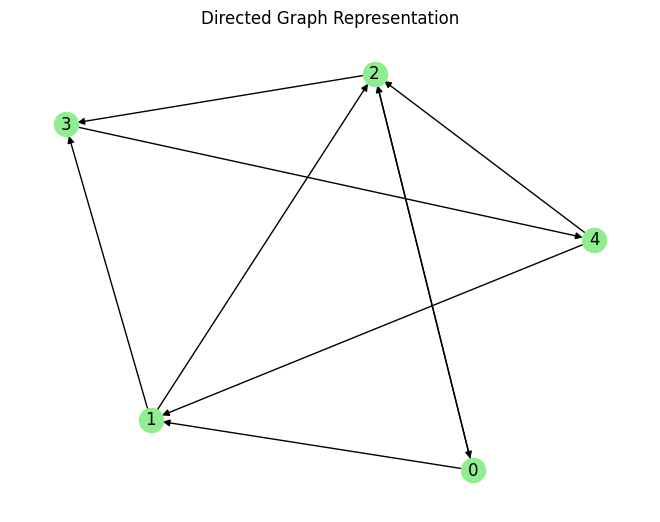

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def pagerank(graph, num_iterations=3, d=0.85):
    num_pages = len(graph)

    # Initialize PageRank values
    pagerank_values = np.ones(num_pages) / num_pages

    # Convert graph to a stochastic matrix
    stochastic_matrix = np.zeros((num_pages, num_pages))
    for i in range(num_pages):
        out_links = len(graph[i])
        if out_links > 0:
            for j in graph[i]:
                stochastic_matrix[i][j] = 1 / out_links

    # PageRank algorithm
    for _ in range(num_iterations):
        new_pagerank_values = (1 - d) + d * np.dot(stochastic_matrix.T, pagerank_values)
        pagerank_values = new_pagerank_values

    return pagerank_values

if __name__ == "__main__":
    # Define a new graph using an adjacency list
    graph = [
        [1, 2],    # Page 0 links to Page 1 and Page 2
        [2, 3],    # Page 1 links to Page 2 and Page 3
        [0, 3],    # Page 2 links to Page 0 and Page 3
        [4],       # Page 3 links to Page 4
        [1, 2]     # Page 4 links to Page 1 and Page 2
    ]

    pagerank_values = pagerank(graph)
    for i, value in enumerate(pagerank_values):
        print(f"Page {i} PageRank: {value:.4f}")

    G = nx.DiGraph()
    for i, links in enumerate(graph):
        for link in links:
            G.add_edge(i, link)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', arrows=True)
    plt.title("Directed Graph Representation")
    plt.show()